In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [141]:
df = pd.read_csv("prices-split-adjusted.csv")

In [142]:
def select_company():
    return input()

In [143]:
data = df.loc[df['symbol'] == select_company()]

ZION


In [144]:
df = df.sort_values(by="date")

In [145]:
data

,date,symbol,open,close,low,high,volume
716,2010-01-04,ZION,12.940000,13.330000,12.880000,13.370000,3974600.0
1184,2010-01-05,ZION,13.280000,13.800000,13.230000,13.830000,5605500.0
1652,2010-01-06,ZION,13.670000,15.000000,13.660000,15.010000,12615200.0
2120,2010-01-07,ZION,14.970000,16.680000,14.950000,17.000000,24716800.0
2588,2010-01-08,ZION,16.190001,16.410000,15.520000,16.660000,6903000.0
...,...,...,...,...,...,...,...
849260,2016-12-23,ZION,43.779999,43.860001,43.590000,43.939999,1243400.0
849760,2016-12-27,ZION,44.099998,43.930000,43.669998,44.150002,1096300.0
850260,2016-12-28,ZION,44.029999,43.279999,43.180000,44.029999,1055200.0
850760,2016-12-29,ZION,43.270000,42.790001,42.630001,43.639999,1551600.0


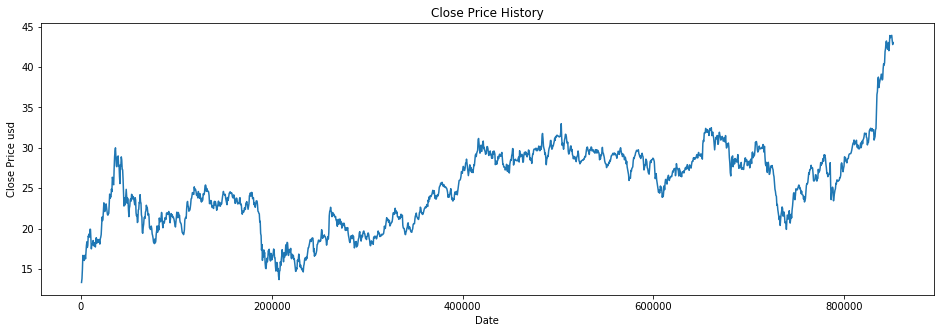

In [146]:
plt.figure(figsize=(16,5))
plt.title('Close Price History')
plt.plot(data['close'])
plt.xlabel('Date')
plt.ylabel('Close Price usd')
plt.show()

In [147]:
new_data = pd.DataFrame()
new_data['year'] = pd.DatetimeIndex(data['date']).year
new_data['month'] = pd.DatetimeIndex(data['date']).month
new_data['day'] = pd.DatetimeIndex(data['date']).day

In [148]:
new_data

,year,month,day
0,2010,1,4
1,2010,1,5
2,2010,1,6
3,2010,1,7
4,2010,1,8
...,...,...,...
1757,2016,12,23
1758,2016,12,27
1759,2016,12,28
1760,2016,12,29


In [149]:
data = data.set_index('date')
data.index

Index(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08',
       '2010-01-11', '2010-01-12', '2010-01-13', '2010-01-14', '2010-01-15',
       ...
       '2016-12-16', '2016-12-19', '2016-12-20', '2016-12-21', '2016-12-22',
       '2016-12-23', '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30'],
      dtype='object', name='date', length=1762)

In [150]:
x = new_data
x

,year,month,day
0,2010,1,4
1,2010,1,5
2,2010,1,6
3,2010,1,7
4,2010,1,8
...,...,...,...
1757,2016,12,23
1758,2016,12,27
1759,2016,12,28
1760,2016,12,29


In [151]:
y = data.close
y

date
2010-01-04    13.330000
2010-01-05    13.800000
2010-01-06    15.000000
2010-01-07    16.680000
2010-01-08    16.410000
                ...    
2016-12-23    43.860001
2016-12-27    43.930000
2016-12-28    43.279999
2016-12-29    42.790001
2016-12-30    43.040001
Name: close, Length: 1762, dtype: float64

In [152]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [153]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x_train,y_train)
regressor.score(x_test,y_test)

0.985976129959834

In [154]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv1 = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)

cross_val_score(regressor, x,y, cv = cv1)

array([0.98597613, 0.98523305, 0.98411153, 0.98408882, 0.97998147])

In [155]:
y_pred = regressor.predict(x_test,)

In [156]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
date,,
2014-08-20,28.650000,28.370001
2012-08-27,19.059999,19.209999
2011-08-22,15.040000,15.680000
2012-03-21,22.070000,22.200001
2015-05-07,28.580000,28.719999
...,...,...
2014-02-27,30.790001,29.930000
2013-11-08,29.639999,28.240000
2012-02-23,18.910000,19.000000


In [157]:
df = df.sort_values(by="date")
df

,Actual,Predicted
date,,
2010-01-08,16.410000,16.680000
2010-01-11,16.510000,16.350000
2010-01-12,16.049999,16.350000
2010-01-15,16.260000,16.709999
2010-01-25,17.920000,19.080000
...,...,...
2016-11-04,31.389999,32.250000
2016-11-08,32.400002,32.250000
2016-12-07,42.290001,41.919998


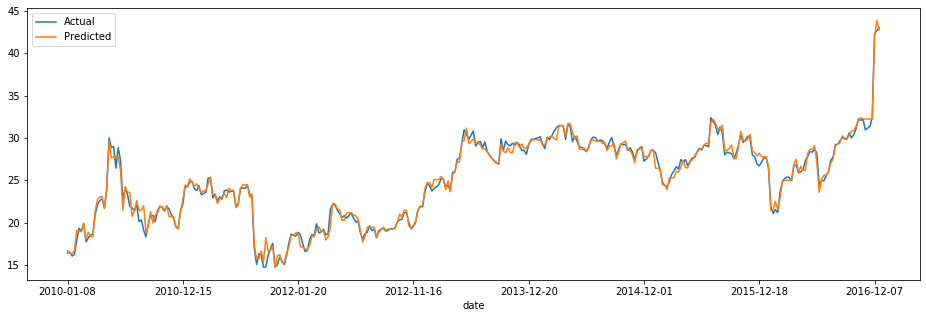

In [158]:
df.plot(kind = 'line',figsize=(16,5))

In [159]:
#Last Day
x1 = pd.DataFrame({'year': [2016], 'month':[12], 'day': [30]})
regressor.predict(x1)

array([42.790001])

In [160]:
#Next Day
x1 = pd.DataFrame({'year': [2016], 'month':[12], 'day': [31]})
regressor.predict(x1)

array([42.790001])

In [161]:
#Next Day
x1 = pd.DataFrame({'year': [2017], 'month':[1], 'day': [1]})
regressor.predict(x1)

array([26.709999])